<center>Jaemin Son, 2018320192</center><br>

# Exercises with Gradient Descent

epoch 20, x1 -0.943467, x2 -0.000073


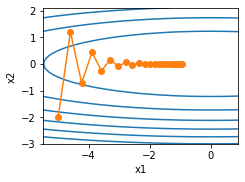

In [1]:
import sys
sys.path.insert(0, '..')
%matplotlib inline
import d2l
import numpy as np
import torch.optim

eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


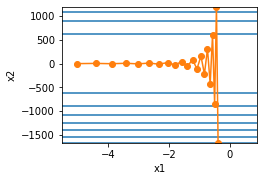

In [2]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

# The Momentum Method

epoch 20, x1 -0.062843, x2 0.001202


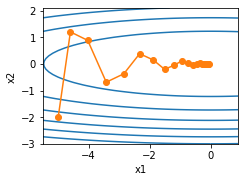

In [3]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


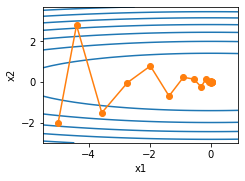

In [4]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

# Expanding the velocity variable $\mathbf v_t$

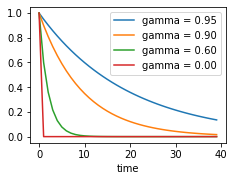

In [5]:
gammas = [0.95, 0.9, 0.6, 0]
d2l.set_figsize((3.5, 2.5))
for gamma in gammas:
    x = np.arange(40)
    d2l.plt.plot(x, gamma ** x, label='gamma = %.2f'%gamma)
d2l.plt.xlabel('time')
d2l.plt.legend();

# Implementation from Scratch

In [6]:
def init_momentum_states(feature_dim):
    v_w = np.zeros((feature_dim, 1))
    v_b = np.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        v[:] = hyperparams['momentum'] * v + hyperparams['lr'] * p.grad
        p[:] -= v

# Concise Implementation

loss: 0.243, 0.007 sec/epoch


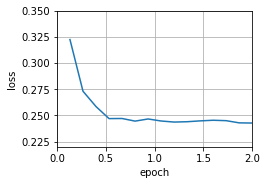

In [7]:
def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch10(torch.optim.SGD, {'lr': lr, 'momentum': momentum}, data_iter, 
                   feature_dim, num_epochs)
    
data_iter, feature_dim = d2l.get_data_ch10(batch_size=10)
train_momentum(0.02, 0.5)

loss: 0.267, 0.006 sec/epoch


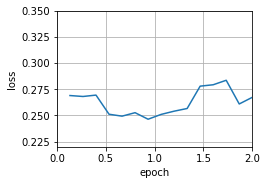

In [8]:
train_momentum(0.02, 0.9)

loss: 0.245, 0.005 sec/epoch


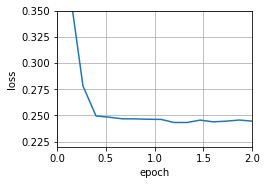

In [9]:
train_momentum(0.004, 0.9)

# Discussions
1. Normal gradient descent algorithm has a problem that it might wander around optimal point, which can be eased by momentum.